### 参考  
- https://www.juen.ac.jp/lab/okumura/handout/160201R%E3%81%AB%E3%82%88%E3%82%8B%E5%9B%A0%E5%AD%90%E5%88%86%E6%9E%90.pages.pdf

In [1]:
library(openxlsx)

In [2]:
df <- read.xlsx("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/COVID-19/data/data_covid_fix_name.xlsx")

In [81]:
df <- na.omit(df)
# index reset
rownames(df) <- 1:nrow(df)
head(df)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
5,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65
6,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50


In [83]:
data = df[,c(2,3,4,5,6,9,10,13)]

# log
data = log(data)
# 標準化
data= scale(data)

head(data)

,pop,urb,gdp,dist,hf,date_first,detection,air
1,-0.8304081,0.14522960,0.00803967,-0.10000665,0.83937737,0.40068236,0.9784892,-0.7001144
2,0.8179593,0.55943437,0.13185308,0.37723785,-1.86965358,-0.09390578,-2.1891023,0.4308812
3,0.6247775,0.32948958,-0.60487411,0.63280474,-1.39618757,0.84870044,-1.4943360,-1.2074928
4,0.8499898,1.08357748,0.37271488,1.70998847,0.03871705,0.20577415,0.9924628,-0.1043414
5,0.4965495,0.93662818,1.14624886,0.05180777,1.40807981,-2.20412299,1.4470387,1.3424378
6,-0.1398002,0.06918419,1.20586029,-0.07254229,1.30989675,-0.09390578,0.9525753,0.6888197


In [84]:
# 相関行列
cor_matrix = cor(data)
cor_matrix

,pop,urb,gdp,dist,hf,date_first,detection,air
pop,1.0000000,-0.1535517,-0.1874428,-0.17005802,-0.25669267,-0.3798007,0.2437106,0.4390933
urb,-0.1535517,1.0000000,0.7529266,0.14060609,0.35829587,-0.2408524,0.2213438,0.4242754
gdp,-0.1874428,0.7529266,1.0000000,-0.14733054,0.53840508,-0.4409726,0.3661454,0.5891162
dist,-0.1700580,0.1406061,-0.1473305,1.00000000,0.02783806,0.4115793,-0.2288309,-0.2784177
hf,-0.2566927,0.3582959,0.5384051,0.02783806,1.00000000,-0.3227300,0.5194979,0.2496598
date_first,-0.3798007,-0.2408524,-0.4409726,0.41157927,-0.32273000,1.0000000,-0.4436538,-0.6145104
detection,0.2437106,0.2213438,0.3661454,-0.22883094,0.51949789,-0.4436538,1.0000000,0.4620540
air,0.4390933,0.4242754,0.5891162,-0.27841770,0.24965984,-0.6145104,0.4620540,1.0000000


In [85]:
# 固有値
eigenvalue　= eigen(cor_matrix)$values
eigenvalue

[1] 3.2940895 1.8139078 0.9550529 0.8506228 0.4465154 0.2992735 0.2103101
[8] 0.1302280

In [86]:
# 固有ベクトル
eigenvector　= eigen(cor_matrix)$vectors
eigenvector

-0.1101945,0.6021132,0.37923281,0.33290730,0.01672323,-0.03692528,-0.52614993,0.30363663
-0.3457896,-0.3890415,0.44260838,-0.15011569,0.20900561,-0.46377227,-0.32851405,-0.37940713
-0.4510701,-0.3017049,0.10691483,-0.28538511,0.06413042,0.13021587,0.08004694,0.76495625
0.1786327,-0.3906701,0.48211330,0.63503899,-0.26090395,0.02074917,0.31625210,0.10603141
-0.3388959,-0.3337128,-0.44309998,0.35230334,-0.32181234,0.29466419,-0.50109385,-0.10883428
0.4146963,-0.2794451,0.04856175,0.08118728,0.69186572,0.41580075,-0.29301114,0.05969747
-0.3819424,0.1044106,-0.33972915,0.49939228,0.54213713,-0.28663592,0.31929542,0.01968484
-0.4474476,0.2051878,0.31985083,-0.04262807,0.08774613,0.65137370,0.26442717,-0.38943306


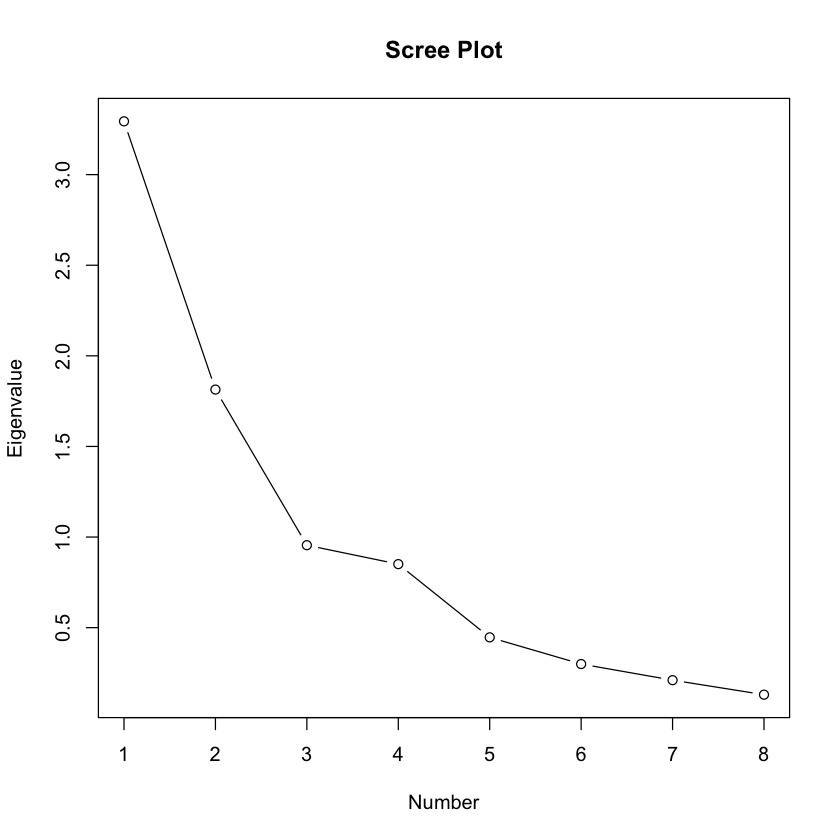

In [87]:
# スクリープロット
# 固有値の1以上の数を観察(この場合2)
# 固有値の1以上の数が共通因子の数に関係する
plot(eigenvalue, type="b", main="Scree Plot", xlab="Number", ylab="Eigenvalue")

# 因子分析  

In [88]:
# 因子の回転法を“varimax”もしくは“promax”から選択する。回転させない場合は“none”と指定。
# factor：共通因子の数を指定する。
fit0<- factanal(x=data, factors=2, rotation="none",scores="Bartlett")
fit1<- factanal(x=data, factors=2, rotation="varimax",scores="Bartlett")
fit2<- factanal(x=data, factors=2, rotation="promax",scores="Bartlett")

In [89]:
# cutoff=0 は（値の小さいものも含め）全ての因子負荷の値を表示させる指示
# Uniquenesses：独自性 (=1-共通性) 
# 因子の回転によって因子負荷と寄与の値は変化するが、独自性の値は変化しない（ということは共通性の値も変化しない）
print(fit0, cutoff=0)


Call:
factanal(x = data, factors = 2, scores = "Bartlett", rotation = "none")

Uniquenesses:
       pop        urb        gdp       dist         hf date_first  detection 
     0.286      0.427      0.005      0.873      0.702      0.476      0.712 
       air 
     0.226 

Loadings:
           Factor1 Factor2
pop        -0.180   0.825 
urb         0.754  -0.068 
gdp         0.997  -0.009 
dist       -0.149  -0.324 
hf          0.540  -0.081 
date_first -0.447  -0.569 
detection   0.372   0.387 
air         0.596   0.646 

               Factor1 Factor2
SS loadings      2.603   1.690
Proportion Var   0.325   0.211
Cumulative Var   0.325   0.537

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 104.92 on 13 degrees of freedom.
The p-value is 1.83e-16 


In [90]:
print(fit1, cutoff=0)


Call:
factanal(x = data, factors = 2, scores = "Bartlett", rotation = "varimax")

Uniquenesses:
       pop        urb        gdp       dist         hf date_first  detection 
     0.286      0.427      0.005      0.873      0.702      0.476      0.712 
       air 
     0.226 

Loadings:
           Factor1 Factor2
pop        -0.402   0.743 
urb         0.743   0.143 
gdp         0.961   0.268 
dist       -0.053  -0.353 
hf          0.541   0.072 
date_first -0.272  -0.671 
detection   0.250   0.475 
air         0.394   0.786 

               Factor1 Factor2
SS loadings      2.225   2.068
Proportion Var   0.278   0.259
Cumulative Var   0.278   0.537

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 104.92 on 13 degrees of freedom.
The p-value is 1.83e-16 


In [91]:
print(fit2, cutoff=0)


Call:
factanal(x = data, factors = 2, scores = "Bartlett", rotation = "promax")

Uniquenesses:
       pop        urb        gdp       dist         hf date_first  detection 
     0.286      0.427      0.005      0.873      0.702      0.476      0.712 
       air 
     0.226 

Loadings:
           Factor1 Factor2
pop        -0.487   0.843 
urb         0.759  -0.008 
gdp         0.974   0.074 
dist       -0.023  -0.350 
hf          0.556  -0.039 
date_first -0.220  -0.630 
detection   0.216   0.434 
air         0.336   0.722 

               Factor1 Factor2
SS loadings      2.279   1.947
Proportion Var   0.285   0.243
Cumulative Var   0.285   0.528

Factor Correlations:
        Factor1 Factor2
Factor1   1.000  -0.285
Factor2  -0.285   1.000

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 104.92 on 13 degrees of freedom.
The p-value is 1.83e-16 


In [92]:
unclass(fit1$loadings)　

,Factor1,Factor2
pop,-0.4020358,0.74297671
urb,0.7430598,0.14301895
gdp,0.9608995,0.26771818
dist,-0.0534007,-0.35297926
hf,0.5413911,0.07163641
date_first,-0.2719973,-0.67102067
detection,0.2500562,0.47489143
air,0.3939073,0.78635833


### 因子負荷量の可視化  
- factor1・・・gdp, urb, hfが影響(先進国)  
- factor2・・・pop, air, data_firstが影響()  

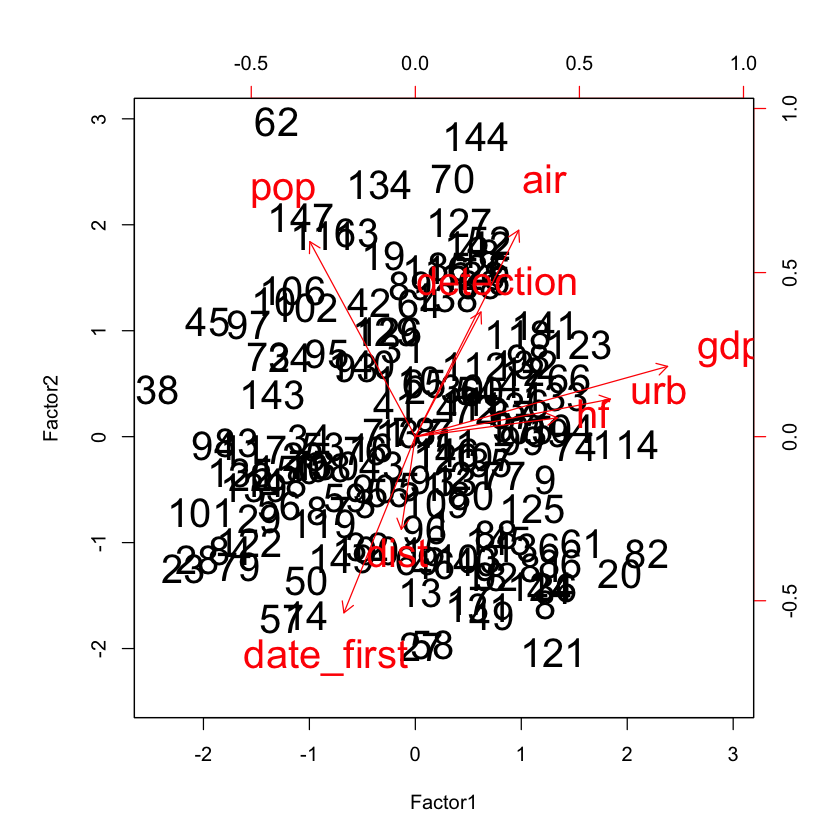

In [93]:
biplot(fit1$scores,fit1$loading,cex=2)

In [99]:
# factor2（第二共通因子）までの累積寄与率は、0.537(0.5を超えておけばok?)
fit1


Call:
factanal(x = data, factors = 2, scores = "Bartlett", rotation = "varimax")

Uniquenesses:
       pop        urb        gdp       dist         hf date_first  detection 
     0.286      0.427      0.005      0.873      0.702      0.476      0.712 
       air 
     0.226 

Loadings:
           Factor1 Factor2
pop        -0.402   0.743 
urb         0.743   0.143 
gdp         0.961   0.268 
dist               -0.353 
hf          0.541         
date_first -0.272  -0.671 
detection   0.250   0.475 
air         0.394   0.786 

               Factor1 Factor2
SS loadings      2.225   2.068
Proportion Var   0.278   0.259
Cumulative Var   0.278   0.537

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 104.92 on 13 degrees of freedom.
The p-value is 1.83e-16 

In [146]:
score = fit1$score
score

,Factor1,Factor2
1,0.239466982,-0.80673295
2,0.001249695,0.44629474
3,-0.466127050,-0.63063391
4,0.306802239,0.27832793
5,0.792748876,1.47137794
6,1.161208313,0.31343117
7,0.254227231,0.04010500
8,1.226749279,-1.58678690
9,1.232507039,-0.40485092
10,-1.333605744,1.27841284


In [147]:
max(score[,"Factor1"])

[1] 2.186788

In [154]:
# index82
score[,"Factor1"]

1            2            3            4            5            6 
 0.239466982  0.001249695 -0.466127050  0.306802239  0.792748876  1.161208313 
           7            8            9           10           11           12 
 0.254227231  1.226749279  1.232507039 -1.333605744  0.379926121  1.022118119 
          13           14           15           16           17           18 
 0.051742081 -1.024396909  0.075216825 -0.416541952  0.503034781  0.662780757 
          19           20           21           22           23           24 
-0.302636291  1.933758729  0.545195132 -1.555936735 -2.190186641 -1.179758494 
          25           26           27           28           29           30 
-1.043764316  0.695007825  0.062743585 -2.056665282 -1.469148561  0.445742577 
          31           32           33           34           35           36 
-0.116020450 -0.453305803  0.379231541 -0.994972315  0.711474410  1.325158563 
          37           38           39           40           41           42 
 0.935953241 -2.435203837  1.250658421  0.570642514 -0.183842693 -0.428683921 
          43           44           45           46           47           48 
-0.314081218  1.271132473 -1.956731905  0.174578259  1.004994030  0.598072949 
          49           50           51           52           53           54 
 0.725570995 -1.025919577  0.054627955  0.700381777 -0.867865208  0.587331636 
          55           56           57           58           59           60 
-0.250588277 -1.278512838 -1.258203801  0.160419023 -0.660885473  0.633812473 
          61           62           63           64           65           66 
 1.578595082 -1.305399758 -0.549250682  0.045398008  0.085193037  1.457427799 
          67           68           69           70           71           72 
 0.912621654  0.605546897  0.021613497  0.357602189 -0.287465886  0.567254633 
          73           74           75           76           77           78 
-1.384037551  1.513235625 -0.991185268 -0.472360162  0.837592431 -0.009009921 
          79           80           81           82           83           84 
-1.668453665  0.536464904  1.195525031  2.186788188 -1.682010524 -1.742646945 
          85           86           87           88           89           90 
 0.324891660  1.370505272 -0.813504779  0.765559364 -0.043739573 -0.381863681 
          91           92           93           94           95           96 
 0.159551454  0.766791766 -0.554239325 -1.898740135 -0.832737732  0.091757387 
          97           98           99          100          101          102 
-1.568782379  1.065930191  1.007895779 -0.462270470 -2.021994433 -1.036800274 
         103          104          105          106          107          108 
 0.503871046  1.378495668  0.988272703 -1.155249837  0.633744058 -0.914322620 
         109          110          111          112          113          114 
 0.196900840 -0.066631519 -0.865461925  0.559978156  0.732346741  1.989676146 
         115          116          117          118          119          120 
 0.563044393  0.194164309 -1.521498290  0.971305485 -0.872452112  0.294574732 
         121          122          123          124          125          126 
 1.304616389 -1.562390140  1.548142385  1.186356389  1.108750192 -0.242912368 
         127          128          129          130          131          132 
 0.416945915  0.542903485 -0.281512845 -0.844357262  0.598141699  1.034566246 
         133          134          135          136          137          138 
 1.325843067 -0.338534581 -1.649182666  1.055990095 -0.056608958  0.285395385 
         139          140          141          142          143          144 
-1.520576549 -0.500702131  1.225702310  0.593726495 -1.346935691  0.575621490 
         145          146          147          148          149          150 
 0.783803955  0.294607845 -1.077738987 -1.327918401 -0.694449134 -1.207981464

In [149]:
max(score[,"Factor2"])

[1] 2.976276

In [153]:
# index62
score[,"Factor2"]

1           2           3           4           5           6 
-0.80673295  0.44629474 -0.63063391  0.27832793  1.47137794  0.31343117 
          7           8           9          10          11          12 
 0.04010500 -1.58678690 -0.40485092  1.27841284 -0.06374919  0.62132643 
         13          14          15          16          17          18 
-1.47183417 -1.68276736 -1.08657084 -0.09936701 -1.54617598 -1.31484451 
         19          20          21          22          23          24 
 1.71485413 -1.28993465 -0.35923236 -0.37702928 -1.24572696  0.75311860 
         25          26          27          28          29          30 
-0.18331518  1.59281782 -1.98006808 -1.15406992 -0.76709655  0.45956329 
         31          32          33          34          35          36 
 0.83330007 -1.03174242 -0.41889459 -0.01312153 -0.24608433 -1.42524229 
         37          38          39          40          41          42 
 0.08865515  0.44431323  0.03705020 -1.17303067  0.30324504  1.26834427 
         43          44          45          46          47          48 
-0.27411395 -1.43866999  1.08768880 -1.20223754  0.50689351  1.73353720 
         49          50          51          52          53          54 
-1.68539928 -1.36053171 -0.47220088  1.85533002 -0.09452301  0.44022705 
         55          56          57          58          59          60 
-0.53010230 -0.65184910 -1.71783293 -1.96506442 -0.57716809  0.42673804 
         61          62          63          64          65          66 
-1.00386176  2.97627624  1.92441518  1.25520286  0.50134703  0.54903153 
         67          68          69          70          71          72 
 0.20645933  1.43471881 -1.17023446  2.43852093  0.04197425  0.26449427 
         73          74          75          76          77          78 
 0.75622995 -0.08974272 -0.26496650 -0.12846444 -0.36735446  0.04848131 
         79          80          81          82          83          84 
-1.21971381 -0.55247716 -1.22995284 -1.10327065 -0.05334478 -1.07036653 
         85          86          87          88          89          90 
 1.60613713 -1.19713148 -0.69479927 -0.92579069  1.43091011 -0.48898125 
         91          92          93          94          95          96 
-0.40437714 -1.31691119  0.65443199 -0.08638004  0.78239632 -0.87434432 
         97          98          99         100         101         102 
 1.05574094  0.73974186 -0.03052728 -1.07132042 -0.71695846  1.21969219 
        103         104         105         106         107         108 
-1.14954308  0.07995226  0.06492967  1.38214231 -0.18336874 -0.29322146 
        109         110         111         112         113         114 
-0.62818047  0.53588613  1.89898679  0.66673591  0.28690291 -0.07009626 
        115         116         117         118         119         120 
 0.32996229  1.58088917 -0.11931663  0.96138406 -0.81851232 -0.19260735 
        121         122         123         124         125         126 
-2.03031369 -0.99811455  0.87195333 -1.40653751 -0.67719811  0.99127681 
        127         128         129         130         131         132 
 2.02449364  1.52611722  0.99572285 -0.27416819 -1.61361735  0.68297099 
        133         134         135         136         137         138 
 0.38397954  2.38011748 -0.33272969 -1.04438447  0.03229903  1.31644989 
        139         140         141         142         143         144 
-0.47429188  0.68335203  1.04950122  1.80555943  0.39857565  2.83307551 
        145         146         147         148         149         150 
-0.98188990 -0.14938561  2.07271074 -0.43395885 -1.14509644 -0.31068167

In [172]:
df[c(62, 70, 121, 127, 134, 144, 147),]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62,India,1352617328,34.030,7762.882,2777278,6.64,6.368844,6.91,31,47.4,1,7815,164035.64
70,Japan,126529100,91.616,42797.459,3024190,8.28,8.699179,7.86,16,70.1,1,61,126387.53
121,Seychelles,96762,56.691,30557.076,7212932,7.16,7.158513,7.16,76,33.4,1,153747,455.20
127,South Korea,51635256,81.459,40111.776,2146566,8.20,8.814165,7.59,21,92.1,1,239,88157.88
134,Thailand,69428524,49.949,19051.333,2392656,6.55,6.247297,6.86,14,81.0,1,60,76053.04
144,USA,327167434,82.256,62794.586,10196715,8.46,8.720049,8.19,22,98.2,1,391,889022.00
147,Vietnam,95540395,35.919,7447.814,2220676,6.29,6.310973,6.27,25,57.4,1,896,47049.67


# 可視化

In [184]:
library(classInt)

In [205]:
library(classInt)
#b5 n等分する、style=によって分け方変わるので注意
b5<-classIntervals(as.integer(df$air),n=5)

#c5はb5で分けした数(length(b5$brks)の色を用意
c5<-rev(heat.colors(length(b5$brks)-1))
#b.colで区分の色を決める
b.col<-findColours(b5,c5)

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(-0.105360515657826, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(-0.105360515657826, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(-0.105360515657826, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(-0.105360515657826, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(-0.105360515657826, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(-0.105360515657826, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in title(mapTitle):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in title(mapTitle):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka'

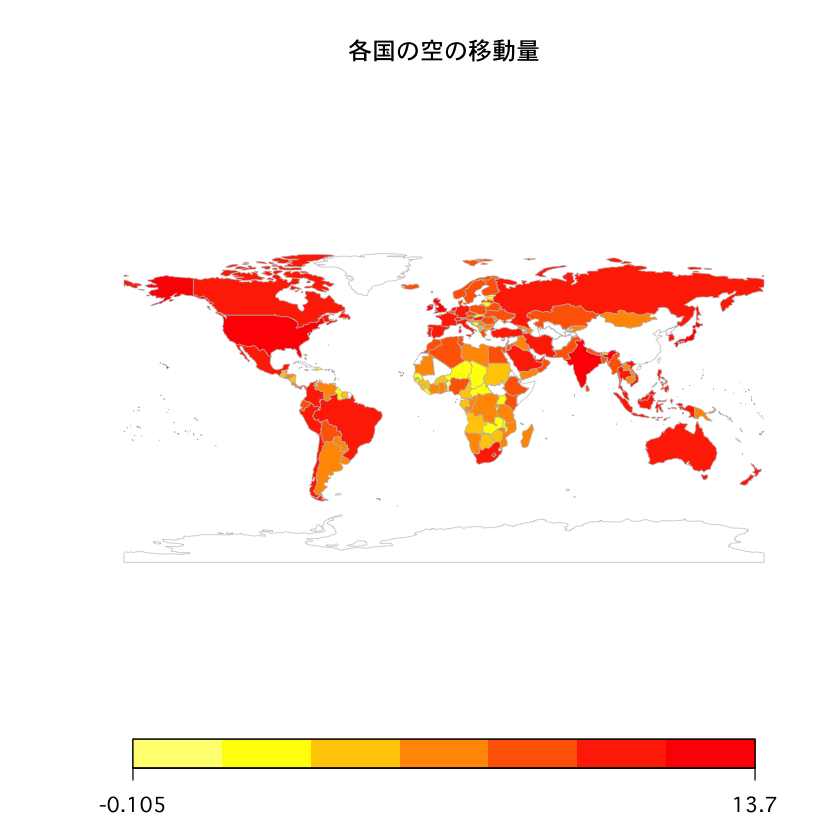

In [229]:
tmp = df
tmp["air"] = log(tmp["air"])

map_obj <- joinCountryData2Map(tmp, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="air"
               , catMethod="fixedWidth"
               , mapTitle = "各国の空の移動量"
               #, colourPalette=heat.colors(7)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(11.4800096342086, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(11.4800096342086, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(11.4800096342086, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(11.4800096342086, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(11.4800096342086, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(11.4800096342086, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in title(mapTitle):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in title(mapTitle):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”


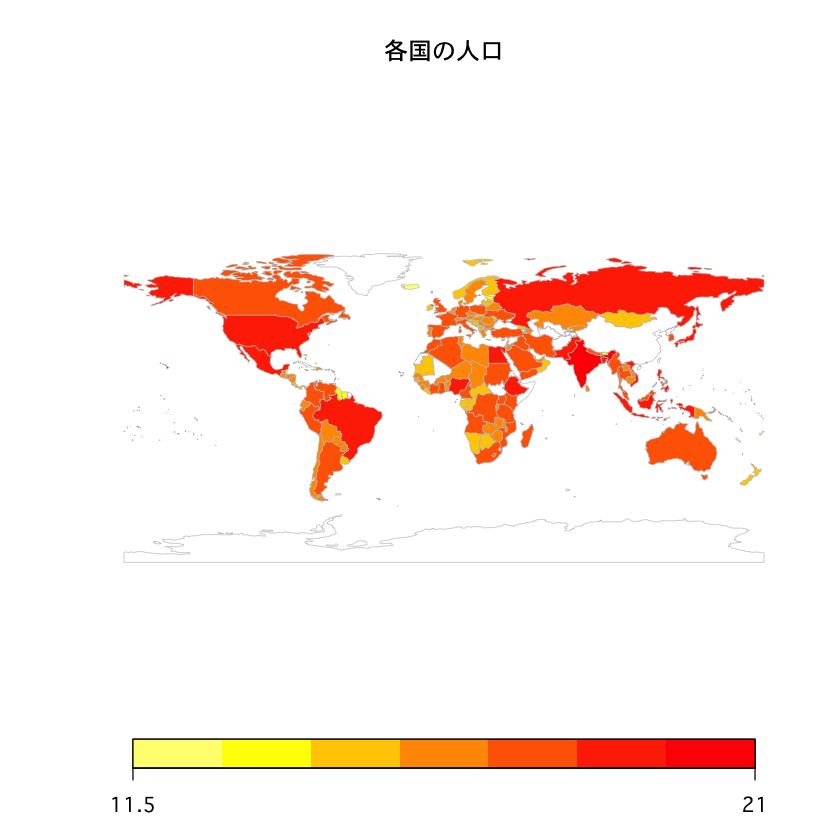

In [228]:
tmp = df
tmp["pop"] = log(tmp["pop"])

map_obj <- joinCountryData2Map(tmp, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="pop"
               , catMethod="fixedWidth"
               , mapTitle = "各国の人口"
               #, colourPalette=heat.colors(7)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in axis(side = 1, mgp = c(3, 1, 0), las = 0, at = c(14, 102), cex.axis = 1, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in title(mapTitle):
“ ポストスクリプトフォントのデータベースにフォントファミリ 'Osaka' が見付かりません ”
Warning message in title(mapTitle):
“ ポストスクリプトフォント

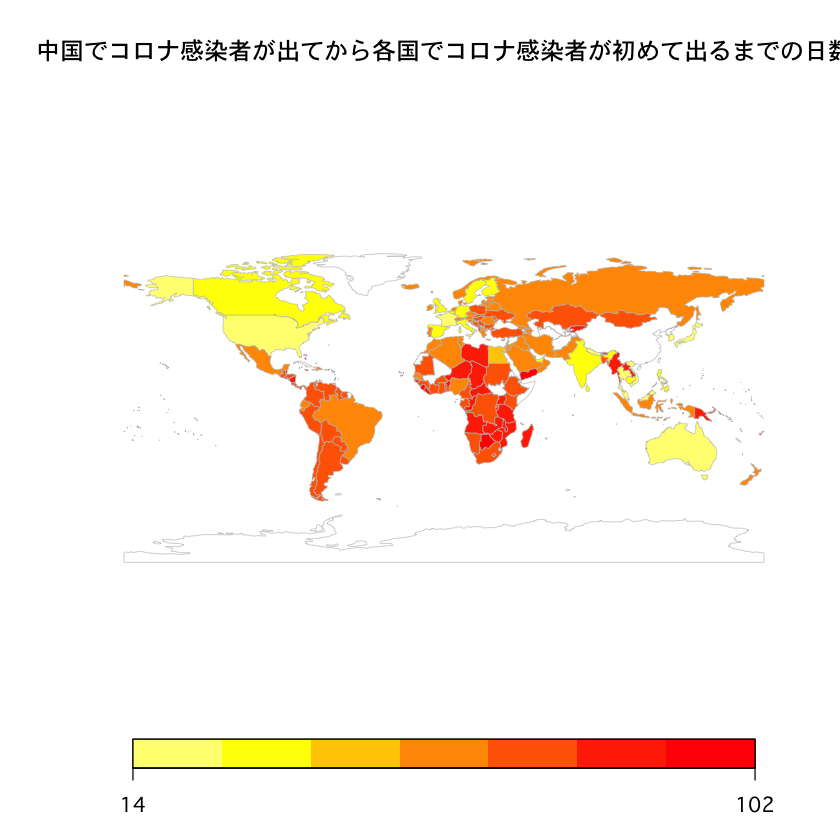

In [227]:
map_obj <- joinCountryData2Map(df, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="date_first"
               , catMethod="fixedWidth"
               , mapTitle = "中国でコロナ感染者が出てから各国でコロナ感染者が初めて出るまでの日数"
               , colourPalette=rev(heat.colors(7))
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)